### Build a DNN using Keras with `RELU` and `ADAM`

#### Load tensorflow

In [0]:
#%tensorflow_version 2.x

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import keras

from keras.datasets import fashion_mnist

from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.callbacks import EarlyStopping

from warnings import filterwarnings
filterwarnings('ignore')

Using TensorFlow backend.


In [3]:
print(tf.__version__)

1.15.0


#### Collect Fashion mnist data from tf.keras.datasets 

In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [5]:
# Find no.of samples are there in training and test datasets¶
print('Samples for train set:{} test set:{}'.format(x_train.shape[0], x_test.shape[0]))

Samples for train set:60000 test set:10000


In [6]:
# Find dimensions of an image in the dataset
print('Dimensions for train set:{} {}'.format(x_train.shape, y_train.shape))
print('Dimensions for test set:{} {}'.format(x_test.shape, y_test.shape))

Dimensions for train set:(60000, 28, 28) (60000,)
Dimensions for test set:(10000, 28, 28) (10000,)


In [7]:
print('Unique Labels for train data-sets are:',np.unique(y_train))
print('Unique Labels for test data-sets are:',np.unique(y_test))

Unique Labels for train data-sets are: [0 1 2 3 4 5 6 7 8 9]
Unique Labels for test data-sets are: [0 1 2 3 4 5 6 7 8 9]


In [0]:
# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

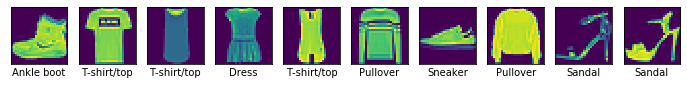

In [9]:
# Plot first few images in the training sets

def visualise_data(ip_image, label):
  plt.figure(figsize=(12,12))

  for i in range(0,10):
    plt.subplot(1,10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(ip_image[i])
    plt.xlabel(fashion_mnist_labels[label[i]])

visualise_data(x_train, y_train)

#### Change train and test labels into one-hot vectors

In [0]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [11]:
print(y_test.shape)
print('First 5 examples now are: ', y_test[0:5])

(10000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


#### Build the Graph

#### Initialize model, reshape & normalize data

In [0]:
# Normalize both the train and test image data from 0-255 to 0-1
x_train = x_train.astype('float32')/ 255
x_test = x_test.astype('float32') / 255

In [13]:
#Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
x_test.shape

(10000, 28, 28, 1)

In [14]:
input_shape = (28,28,1)
num_classes = 10

# Build the model
model = Sequential() 

# add a conv layer 
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))

#convert the conv o/p to vector
model.add(Flatten())

#### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [15]:
# add a dense & drop-out layer
model.add(Dense(200, activation='relu'))
#model.add(Dropout(0.25))

model.add(Dense(100, activation='relu'))
model.add(Dropout(0.25))



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

In [16]:
# add a output layer
model.add(Dense(num_classes, activation='softmax'))

# compile the model for the given configuraitons
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               3686600   
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)             

In [17]:
# Fit the model
#early_stopping = EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
#callback_list = [early_stopping] 

#model.fit(x_train, y_train, validation_split= 0.2,  epochs=10, callbacks=callback_list)
model.fit(x_train, y_train, validation_split= 0.2,  epochs=10)


# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("\n Test Accuracy: %.2f%%" % (scores[1]*100))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 48000 samples, validate on 12000 samples
Epoch 1/10





48000/48000 [==============================] - 176s 4ms/step - loss: 0.4289 - acc: 0.8464 - val_loss: 0.2977 - val_acc: 0.8912
Epoch 2/10
48000/48000 [==============================] - 175s 4ms/step - loss: 0.2608 - acc: 0.9057 - val_loss: 0.2732 - val_acc: 0.9034
Epoch 3/10
48000/48000 [==============================] - 175s 4ms/step - loss: 0.1977 - acc: 0.9267 - val_loss: 0.2600 - val_acc: 0.9092
Epoch 4/10
48000/48000 [==============================] - 179s 4ms/step - loss: 0.1464 - acc: 0.9450 - val_loss: 0.2664 - val_acc: 0.9101
Epoch 5/10
48000/48000 [==============================] - 184s 4ms/step - loss: 0.1061 - acc: 0.9617 - val_loss: 0.3142 - val_acc: 0.9123
Epoch 6/10
48000/48000 [==============================] - 179s 4ms/step - loss: 0.0716 - acc: 0.9733 - val_loss: 0.3624 - val_acc: 0.9105
Epoch 7/10
48000/480